In [7]:
import nibabel as nib
import numpy as np
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt


Data shape: (240, 240, 155)
Data type: float64


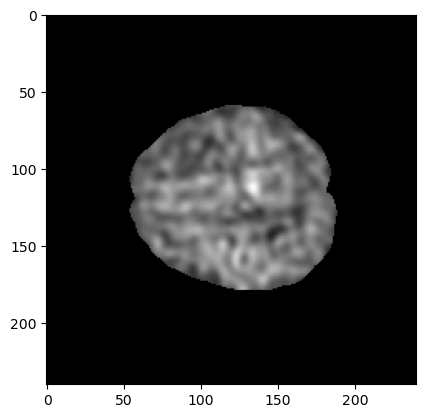

[[0.00190645 0.00190645 0.00190645 ... 0.00190645 0.00190645 0.00190645]
 [0.00190645 0.00190645 0.00190645 ... 0.00190645 0.00190645 0.00190645]
 [0.00190645 0.00190645 0.00190645 ... 0.00190645 0.00190645 0.00190645]
 ...
 [0.00190645 0.00190645 0.00190645 ... 0.00190645 0.00190645 0.00190645]
 [0.00190645 0.00190645 0.00190645 ... 0.00190645 0.00190645 0.00190645]
 [0.00190645 0.00190645 0.00190645 ... 0.00190645 0.00190645 0.00190645]]


In [6]:
# 读取.nii文件,查看正常大脑图像
img = nib.load('E:/LSY/MySplit/Train/UCSF-PDGM-0005_nifti/UCSF-PDGM-0005_ASL.nii.gz')
# 获取图像数据和空间信息
data = img.get_fdata()
affine = img.affine

# 将图像数据转换为Numpy数组
data_array = np.array(data)

# 输出图像数据的形状和数据类型
print('Data shape:', data_array.shape)
print('Data type:', data_array.dtype)
# 选择要显示的切片的编号，比如选择Z轴的第10个切片
z_index = 110

# 获取要显示的切片数据
slice_data = data[:, :, z_index]

# 显示切片
plt.imshow(slice_data, cmap='gray') # cmap='gray'参数用于将图像显示为灰度图像
plt.show()
print(slice_data)


In [4]:
# 读取.nii文件
img = nib.load('E:/LSY/MySplit/Train/UCSF-PDGM-0005_nifti/UCSF-PDGM-0005_ASL.nii.gz')

# 获取图像数据和空间信息
data = img.get_fdata()
affine = img.affine

# 将图像数据转换为Numpy数组
data_array = np.array(data)

# 输出图像数据的形状和数据类型
print('Data shape:', data_array.shape)
print('Data type:', data_array.dtype)

Data shape: (240, 240, 155)
Data type: float64


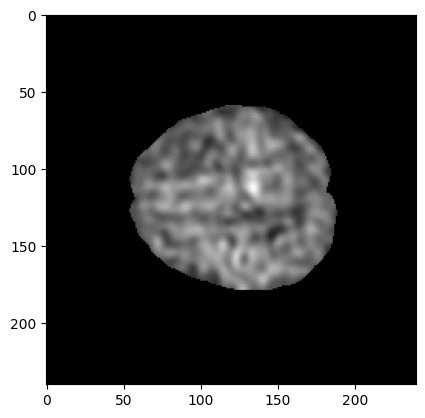

In [5]:
# 加载.nii文件
# img = nib.load('path_to_nii_file.nii').get_fdata()

# 选择要显示的切片的编号，比如选择Z轴的第10个切片
z_index = 110

# 获取要显示的切片数据
slice_data = data[:, :, z_index]

# 显示切片
plt.imshow(slice_data, cmap='gray') # cmap='gray'参数用于将图像显示为灰度图像
plt.show()


交互查看3D

In [7]:
image_path = 'E:/LSY/IXI-T1/IXI002-Guys-0828-T1.nii.gz'
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

image_data = image_obj.get_fdata()
type(image_data)

height, width, depth = image_data.shape
print(f"The image object height: {height}, width:{width}, depth:{depth}")

#查看图像值范围
print(f'image value range: [{image_data.min()}, {image_data.max()}]')
pixdim =  image_obj.header['pixdim'] #pixdim是图像分辨率
print(f'z轴分辨率： {pixdim[3]}')
print(f'in plane 分辨率： {pixdim[1]} * {pixdim[2]}')

#知道层厚信息，以及矩阵大小，就可以求出实际的扫描范围。比如我们要知道z轴方向实际扫了多少mm, 用z轴方向的分辨率 * 矩阵大小。 示例中为 155mm。
z_range = pixdim[3] * depth
x_range = pixdim[1] * height
y_range = pixdim[2] * width
print(x_range, y_range, z_range)

#交互显示
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    plt.imshow(image_data[:, :, layer], cmap='gray');
    plt.title('Explore Layers of MRI', fontsize=20)
    plt.axis('off')
    return layer

interact(explore_3dimage, layer=(0, image_data.shape[-1]-1));

Type of the image <class 'nibabel.nifti1.Nifti1Image'>
The image object height: 256, width:256, depth:150
image value range: [0.0, 1068.0]
z轴分辨率： 1.1999969482421875
in plane 分辨率： 0.9375 * 0.9375
240.0 240.0 179.99954223632812


interactive(children=(IntSlider(value=74, description='layer', max=149), Output()), _dom_classes=('widget-inte…

In [18]:
image_path = r'E:\LSY\UCSF-PDGM-v3\UCSF-PDGM-0011_nifti\UCSF-PDGM-0011_T1.nii.gz'
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

image_data = image_obj.get_fdata()
type(image_data)

height, width, depth = image_data.shape
print(f"The image object height: {height}, width:{width}, depth:{depth}")

#查看图像值范围
print(f'image value range: [{image_data.min()}, {image_data.max()}]')
pixdim =  image_obj.header['pixdim'] #pixdim是图像分辨率
print(f'z轴分辨率： {pixdim[3]}')
print(f'in plane 分辨率： {pixdim[1]} * {pixdim[2]}')

#知道层厚信息，以及矩阵大小，就可以求出实际的扫描范围。比如我们要知道z轴方向实际扫了多少mm, 用z轴方向的分辨率 * 矩阵大小。 示例中为 155mm。
z_range = pixdim[3] * depth
x_range = pixdim[1] * height
y_range = pixdim[2] * width
print(x_range, y_range, z_range)

#交互显示
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    plt.imshow(image_data[:, :, layer], cmap='gray');
    plt.title('Explore Layers of MRI', fontsize=20)
    plt.axis('off')
    return layer

interact(explore_3dimage, layer=(0, image_data.shape[-1]-1));

Type of the image <class 'nibabel.nifti1.Nifti1Image'>
The image object height: 240, width:240, depth:155
image value range: [0.0, 2563.71161269024]
z轴分辨率： 1.0
in plane 分辨率： 1.0 * 1.0
240.0 240.0 155.0


interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

测试选取区间读取

In [10]:
image_path = 'data/MRI/UCSF-PDGM-0005_nifti/UCSF-PDGM-0005_ASL.nii.gz'
image_obj = nib.load(image_path)
image_data = image_obj.get_fdata()

tumor_path = 'data/MRI/UCSF-PDGM-0005_nifti/UCSF-PDGM-0005_tumor_segmentation.nii.gz'
tumor_obj = nib.load(tumor_path)
tumor_data = tumor_obj.get_fdata()

select_section = [30, 50, 70, 90, 110, 140]
image_data = image_data[:,:,select_section]
tumor_data = tumor_data[:,:,select_section]
print(image_data.shape)

def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    plt.imshow(image_data[:, :, layer], cmap='gray');
    plt.title('Explore Layers of MRI', fontsize=20)
    plt.axis('off')
interact(explore_3dimage, layer=(0, image_data.shape[-1]-1));

def explore_3dtumor(layer):
    plt.figure(figsize=(10, 5))
    plt.imshow(tumor_data[:, :, layer], cmap='gray');
    plt.title('Explore Layers of MRI', fontsize=20)
    plt.axis('off')
interact(explore_3dtumor, layer=(0, image_data.shape[-1]-1));

(240, 240, 6)


interactive(children=(IntSlider(value=2, description='layer', max=5), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=2, description='layer', max=5), Output()), _dom_classes=('widget-interac…

查看变换后的MRI

In [1]:
from datasets_3D.Rubik_cube.MRI_rkb_plus_pretask import RKBP_MRI_PretaskSet
from MRI_rkb_plus_config import rkbp_config
config = rkbp_config
Mydataset = RKBP_MRI_PretaskSet(config=config, base_dir=r'J:/LSY/UCSF-PDGM-v3', flag="train")


In [3]:
test = Mydataset[0]

In [5]:
print(test[0].shape)
image_data = test[0][0]
print(image_data.shape)

torch.Size([1, 240, 240, 154])
torch.Size([240, 240, 154])


In [8]:
#交互显示
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    plt.imshow(image_data[:, :, layer], cmap='gray');
    plt.title('Explore Layers of MRI', fontsize=20)
    plt.axis('off')
    return layer

interact(explore_3dimage, layer=(0, image_data.shape[-1]-1));

interactive(children=(IntSlider(value=76, description='layer', max=153), Output()), _dom_classes=('widget-inte…